In [1]:
import numpy as np
import cv2
import IPython
from IPython.display import clear_output

import sys 
import os
sys.path.append(os.path.abspath("../"))
from module.Segmentor import Segmentor

import time

In [31]:
# TODO : Save output to file

filename = '../assets/test.mp4'

inputStream = cv2.VideoCapture(filename)

FPS = int(24)
inputWidth = int(inputStream.get(cv2.CAP_PROP_FRAME_WIDTH))
inputHeight = int(inputStream.get(cv2.CAP_PROP_FRAME_HEIGHT))

outputStream = cv2.VideoWriter('../assets/test-results.mp4',
                               cv2.VideoWriter_fourcc('x', '2', '6', '4'),
                               FPS, (inputWidth, inputHeight))

while inputStream.isOpened():
    ret, frame = inputStream.read()
    
    if not ret:
        print("End of stream? Exiting...")
        break
        
    # Method 1
    segmentor = Segmentor(
        min_p=4,
        max_p=400,
        min_a=1000,
        max_a=20000,
        suit_x_ratio=2 / 7,
        suit_y_ratio=1 / 5,
    )
    
    st = time.time()
    results = segmentor.seg(frame)
    en = time.time()
    print("time:", en - st)
    
    print(len(results))

    frameMarked = frame.copy()
    for result in results:
        contour = np.array(result['bbox'])
        cv2.drawContours(frameMarked, [contour], 0, (0, 0, 255), 3)
    
    # Encode image as jpg numpy array
    _, buf = cv2.imencode(".jpg", frameMarked)
    # Draw result
    IPython.display.display(IPython.display.Image(data=buf))
    outputStream.write(frameMarked)
        
    clear_output(wait=True) 
    
    if cv2.waitKey(1) == ord('q'):
        break
        
outputStream.release()
inputStream.release()

End of stream? Exiting...


time: 0.01271200180053711
22


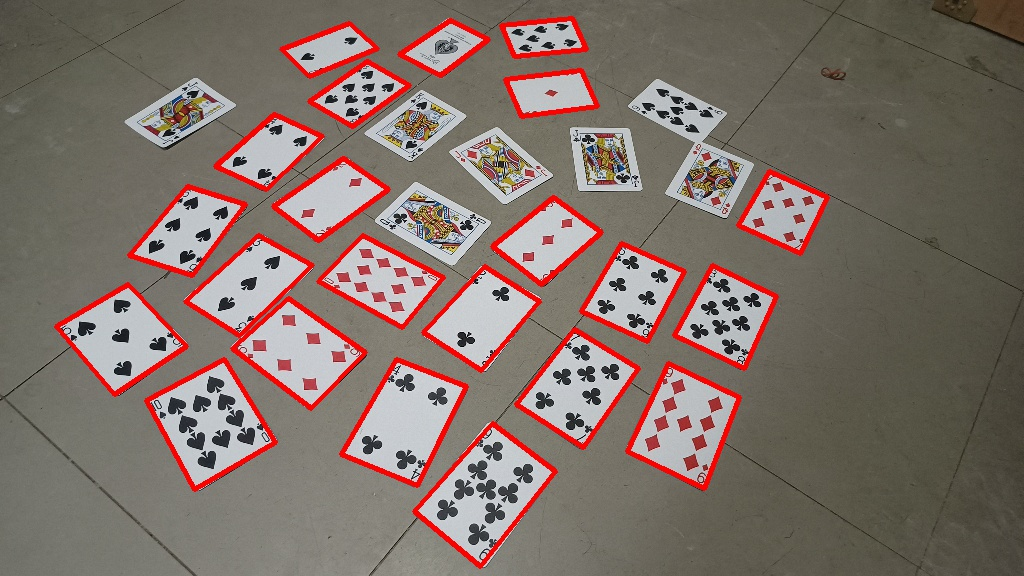

In [27]:
filename = '../bicyclecard/images/IMG_20230520_185700449.jpg'
inputImage = cv2.imread(filename)

segmentor = Segmentor(
    min_p=4,
    max_p=400,
    min_a=1000,
    max_a=20000,
    suit_x_ratio=2 / 7,
    suit_y_ratio=1 / 5,
)
    
st = time.time()
results = segmentor.seg(inputImage)
en = time.time()
print("time:", en - st)

print(len(results))

inputImageMarked = inputImage.copy()
for result in results:
    contour = np.array(result['bbox'])
    cv2.drawContours(inputImageMarked, [contour], 0, (0, 0, 255), 3)
    
# Encode image as jpg numpy array
_, buf = cv2.imencode(".jpg", inputImageMarked)
# Draw result
IPython.display.display(IPython.display.Image(data=buf))